In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
from matplotlib import pyplot as plt
import sys
import matplotlib.animation as animation
import scipy.sparse as sparse
import scipy.io as sio
import scipy.stats as stats
import scipy.spatial.distance as dist
import numpy as np
import h5py
from tqdm import tqdm
import pandas as pd
#import tables
#import deepdish as dd

sys.path.append('/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis')
import python_utils_jjm as jjm_utils

In [3]:
results_file = '/Volumes/My_Passport/cnmfe_analysis_files/GRIN011/memmap_0000memmap_0004_resized_source_extraction_13:05:33.239/frames_1_5000/LOGS_15-Oct_13_10_52/15-Oct_13_23_16.mat_out.mat'
results = sio.loadmat(results_file)

##A is spatial contours

In [4]:
#spatial footprints as 1d array
results['A']

<360960x120 sparse matrix of type '<class 'numpy.float64'>'
	with 159871 stored elements in Compressed Sparse Column format>

In [5]:
#img_file = '/Users/johnmarshall/Documents/Analysis/MiniscopeMovies/GRIN011/H10_M19_S59msCam1.tif'
#img_from_file = plt.imread(img_file)    
#d1, d2 = np.shape(img_from_file)
d1, d2 = 480, 752

In [6]:
results['A'][:, 1]

<360960x1 sparse matrix of type '<class 'numpy.float64'>'
	with 1089 stored elements in Compressed Sparse Column format>

In [7]:
480*752

360960

In [8]:
np.shape(results['A'])

(360960, 120)

In [9]:
dense_A = results['A'].todense()

In [13]:
# reshape spatial coordinates
A_reshaped = [np.reshape(dense_A[:, cell], (480, 752)) for cell in range(np.shape(results['A'])[1])]

In [10]:
frames = np.shape(results['C'])[0]

In [11]:
cells = np.shape(results['C'])[0]

In [7]:
#reshape as 2d with original image dimensions
dense_A = results['A'].todense()
A_reshaped_1 = np.reshape(dense_A[:, 1], (480, 752))
A_reshaped_2 = np.reshape(dense_A[:, 2], (480, 752))

In [24]:
np.shape(A_reshaped)

(120, 480, 752)

In [8]:
# if selecting frame subset  
Ctraces_1 = results['C'][1, :500]
Ctraces_2 = results['C'][2, :500]

In [10]:
movie_ = np.array([np.dot(A_reshaped_1, Ctraces_1[frame]) for frame in range(len(Ctraces_1))])
movie_2 = np.array([np.dot(A_reshaped_2, Ctraces_2[frame]) for frame in range(len(Ctraces_2))])

In [20]:
#reshape for all frames
frame_range = (0, 150)
cells_reshaped = np.empty((cells, frame_range[1], d1, d2))
for cell in tqdm(range(cells)):
    A_reshaped = np.reshape(dense_A[:, cell], (d1, d2))
    cells_reshaped[cell] = np.array([np.dot(A_reshaped, results['C'][cell, frame]) for frame in range(frame_range[0], frame_range[1])])
    


100%|██████████| 120/120 [02:10<00:00,  1.08s/it]


In [25]:
hf = h5py.File('/Volumes/My_Passport/cnmfe_analysis_files/GRIN011/memmap_0000memmap_0004_resized_source_extraction_13:05:33.239/frames_1_5000/LOGS_15-Oct_13_10_52/demixed_movie.h5', 'w')

In [26]:
hf.create_dataset('demixed_movie_array', data=cells_reshaped )

<HDF5 dataset "demixed_movie_array": shape (120, 150, 480, 752), type "<f8">

In [28]:
hf.close()

In [35]:
cells_recombined = np.sum(cells_reshaped, axis=0)

In [36]:
np.shape(cells_recombined)

(150, 480, 752)

In [15]:
print('            '+str(np.argmax(Ctraces_1)))
print('            '+str(np.argmin(Ctraces_1)))

            253
            499


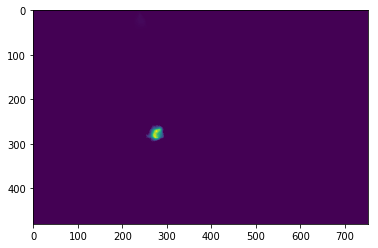

In [17]:
#lowest intensity frame
plt.imshow(movie[253])

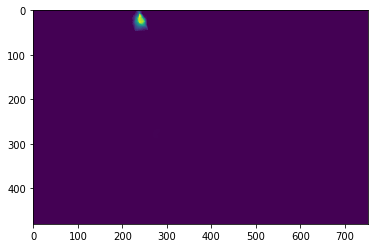

In [18]:
#highest intensity frame
plt.imshow(movie[343])

In [40]:
import imageio


In [42]:
imageio.mimwrite('/Volumes/My_Passport/cnmfe_analysis_files/GRIN011/demixed.mp4', cells_recombined, fps = 20)

Lossy conversion from float64 to uint8. Range [0.0, 17.144301860839185]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 16.00869305994339]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 14.949259841160604]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 13.986830864705937]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 13.08688013577738]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 12.245320261442743]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 14.734950994241487]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uin

Lossy conversion from float64 to uint8. Range [0.0, 7.507083770256033]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 7.740090647622211]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 7.275876984423345]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 7.381595630101776]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 6.906138701809837]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 6.4904741954637695]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 9.016179586415118]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. 

Lossy conversion from float64 to uint8. Range [0.0, 35.27699298234868]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 33.57909500532493]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 34.6339344883619]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 32.064664202533095]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 29.68720416377915]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 27.487146270325795]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 25.876426321373618]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8.